<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 10.1: NN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- **NOTE**: This is a Regression problem. Consider the appropriate:
    - Activation function
    - Loss/Cost Function
    - Metrics

### Import libraries

In [1]:
## Import libraries
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import Normalizer

# import keras
from keras.models import Sequential
from keras.layers import Dense
# from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


### Load data
Load the Diabetes dataset from **SciKit-Learn**.

In [2]:
# insert code here
import sklearn
from sklearn.datasets import load_diabetes

X, y = load_diabetes(return_X_y = True)


In [3]:
X.shape

(442, 10)

In [4]:
y.shape

(442,)

In [5]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [6]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

### Prepare input data

In [7]:
# insert code here
import pandas as pd
df1 = pd.DataFrame(X, columns=["age", "sex", "bmi", "bp", "tc", "ldl", "hdl", "tch", "ltg", "glu"])
print(df1)

          age       sex       bmi        bp        tc       ldl       hdl  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   

          tch       ltg       glu  
0   -0.002592  0.019908 -0.017646  
1  

In [8]:
df2 = pd.DataFrame(y, columns=["disease_progression"])
print(df2)

     disease_progression
0                  151.0
1                   75.0
2                  141.0
3                  206.0
4                  135.0
..                   ...
437                178.0
438                104.0
439                132.0
440                220.0
441                 57.0

[442 rows x 1 columns]


In [9]:
df = pd.merge(df1,df2, left_index=True, right_index=True)
df

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,disease_progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [10]:
df.describe()

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,disease_progression
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


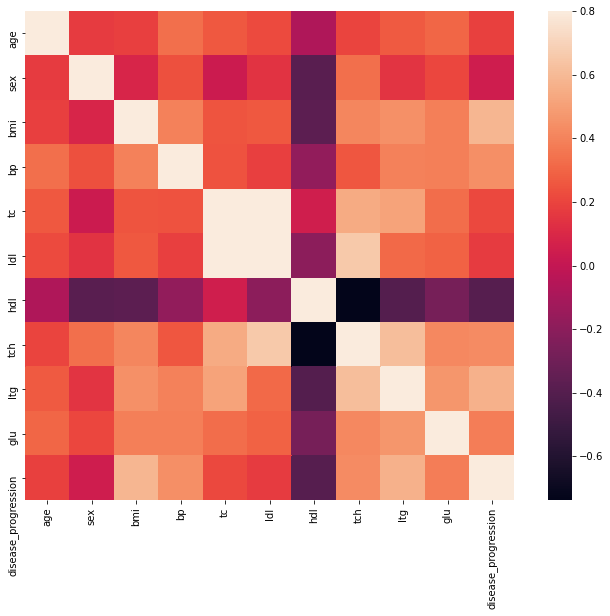

In [11]:
import seaborn as sns
corrmap=df.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmap, vmax=.8, square=True);

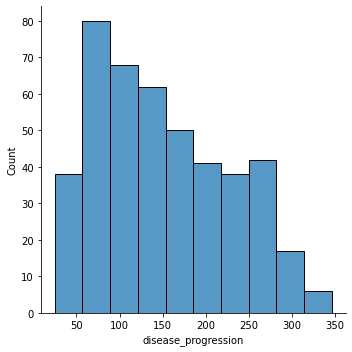

In [12]:
sns.displot(df['disease_progression'])

In [13]:
df

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,disease_progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [14]:
target_column = ['disease_progression'] 
predictors = list(set(list(df.columns))-set(target_column))
df[predictors] = df[predictors]/df[predictors].max()
df.describe()

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,disease_progression
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.280684e-15,2.663531e-15,-4.697223e-15,9.667983e-16,-5.857557e-16,6.607962e-16,-2.530404e-15,2.071056e-15,-2.850598e-15,-2.509988e-15,152.133484
std,4.300594e-01,9.396002e-01,2.792002e-01,3.606296e-01,3.093879e-01,2.395469e-01,2.628286e-01,2.570745e-01,3.564327e-01,3.511423e-01,77.093005
min,-9.683812e-01,-8.808511e-01,-5.293024e-01,-8.512270e-01,-8.237126e-01,-5.815898e-01,-5.646737e-01,-4.124206e-01,-9.438499e-01,-1.015894e+00,25.000000
25%,-3.368589e-01,-8.808511e-01,-2.006920e-01,-2.776074e-01,-2.225132e-01,-1.527175e-01,-1.938257e-01,-2.132076e-01,-2.488701e-01,-2.446617e-01,87.000000
50%,4.861575e-02,-8.808511e-01,-4.270620e-02,-4.294479e-02,-2.807330e-02,-1.921175e-02,-3.634232e-02,-1.399449e-02,-1.457821e-02,-7.946928e-03,140.500000
75%,3.438729e-01,1.000000e+00,1.832135e-01,2.699387e-01,1.842462e-01,1.501318e-01,1.617819e-01,1.852186e-01,2.427655e-01,2.058600e-01,211.500000
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,346.000000


In [15]:
X = df[predictors].values
y = df[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(309, 10)
(133, 10)


### Create the model's architecture

In [16]:
# insert code here
# Define model
model = Sequential()
model.add(Dense(500, input_dim=10, activation= "relu"))
model.add(Dense(100, activation= "relu"))
model.add(Dense(50, activation= "relu"))
model.add(Dense(1))


In [17]:
model.summary() #Print model Summary

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               5500      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               50100     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 60,701
Trainable params: 60,701
Non-trainable params: 0
_________________________________________________________________


### Compile the model

In [18]:
# insert code here
model.compile(
    loss= "mean_squared_error" , 
    optimizer="adam", 
    metrics=["mean_absolute_error"])


### Fit the training data

In [19]:
%%time
# Fit the model
history = model.fit(
    X_train,
    y_train,
    validation_split = 0.25,
    batch_size = 20,
    epochs = 100,
    verbose = 1)

Epoch 1/100
12/12 [==============================] - 9s 37ms/step - loss: 29952.6206 - mean_absolute_error: 154.1338 - val_loss: 24086.0449 - val_mean_absolute_error: 137.8057
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 28318.4512 - mean_absolute_error: 148.2665 - val_loss: 22599.8652 - val_mean_absolute_error: 132.4835
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 25514.5802 - mean_absolute_error: 141.0752 - val_loss: 18768.6621 - val_mean_absolute_error: 118.0632
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 21665.2222 - mean_absolute_error: 124.6008 - val_loss: 11456.9678 - val_mean_absolute_error: 86.2820
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 9286.6294 - mean_absolute_error: 74.6050 - val_loss: 4046.4448 - val_mean_absolute_error: 51.1890
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 4178.1730 - mean_absolute_error: 51.8758 - val_loss: 340

Epoch 96/100
12/12 [==============================] - 0s 2ms/step - loss: 1826.1344 - mean_absolute_error: 33.2937 - val_loss: 2439.9749 - val_mean_absolute_error: 39.0547
Epoch 97/100
12/12 [==============================] - 0s 3ms/step - loss: 2095.2849 - mean_absolute_error: 36.1528 - val_loss: 2443.0205 - val_mean_absolute_error: 39.3906
Epoch 98/100
12/12 [==============================] - 0s 3ms/step - loss: 1999.9620 - mean_absolute_error: 34.5148 - val_loss: 2464.8923 - val_mean_absolute_error: 39.1189
Epoch 99/100
12/12 [==============================] - 0s 3ms/step - loss: 1850.1290 - mean_absolute_error: 32.8744 - val_loss: 2460.5972 - val_mean_absolute_error: 39.4836
Epoch 100/100
12/12 [==============================] - 0s 3ms/step - loss: 2271.8946 - mean_absolute_error: 37.0126 - val_loss: 2503.2039 - val_mean_absolute_error: 39.9865
Wall time: 12.3 s


### Create predictions and evaluate the model

In [20]:
from sklearn.metrics import mean_squared_error
from math import sqrt
# insert code here
pred_train= model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))

pred= model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred))) 

46.36035728370895
61.7266026797403


In [29]:
# Calculate test MSE
# insert code here
mse_value, mae_value = model.evaluate(X_test, y_test, verbose=0)

print(mse_value)

3810.173583984375


In [27]:
score = model.evaluate(X_train, y_train, batch_size = 1000)
print('\nTest loss: %.6f, Test accuracy: %.6f' % tuple(score))

1/1 [==============================] - 0s 16ms/step - loss: 2149.2830 - mean_absolute_error: 36.6672

Test loss: 2149.282959, Test accuracy: 36.667198


In [30]:
# Find RMSE
# insert code here
print(mae_value)

48.431419372558594


In [28]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               5500      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               50100     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 60,701
Trainable params: 60,701
Non-trainable params: 0
_________________________________________________________________
None


### Visualisation of cost

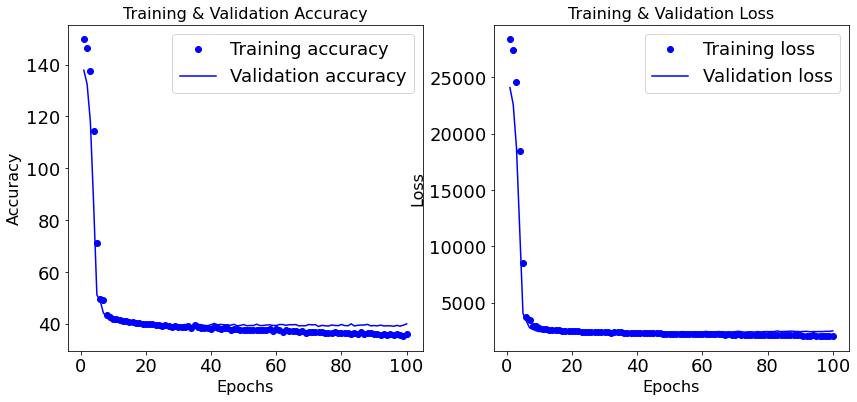

In [34]:
# insert code here
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['mean_absolute_error']
val_accuracy = history_dict['val_mean_absolute_error']
 
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy (MAE) vs Epochs
#
ax[0].plot(epochs, accuracy, 'bo', label='Training accuracy')
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'bo', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

### Visualisation of residuals

In [26]:
# insert code here



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



